# Estimate pose in images using Intel's AI Dev Cloud

### Import Python packages

In [ ]:
import matplotlib.pyplot as plt 
import matplotlib.image as mpimg
import os
import time

### First run - setup Python environment and download pose estimator

In [ ]:
%%writefile pose_job.txt
#PBS -N DetectHumanoids
#PBS -l nodes=1
cd $PBS_O_WORKDIR
echo "Run pose estimation in conda environment"
conda create -n py3 python=3 -y
source activate py3
conda update setuptools -y
# Clone fork of @ildoonet's CPU-optimized TensorFlow implementation of @ZheC's
# Realtime Multi-Person Pose Estimation
git clone --depth=1 -b demo https://github.com/JustinShenk/tf-pose-estimation.git
cd $PBS_O_WORKDIR/tf-pose-estimation
pip install -r requirements.txt
pip install opencv-python
MPLBACKEND=Agg python src/run.py # prevent matplotlib from displaying images
source deactivate
echo "End inference"
# leave an empty line at the bottom or else it won't run


### (For future runs, use the following)

In [6]:
%%writefile pose_job.txt
#PBS -N DetectHumanoids
#PBS -l nodes=1
cd $PBS_O_WORKDIR
echo "Run pose estimation in conda environment"
source activate py3
# Clone fork of @ildoonet's CPU-optimized TensorFlow implementation of @ZheC's
# Realtime Multi-Person Pose Estimation
cd $PBS_O_WORKDIR/tf-pose-estimation
git pull # pull any updates
git checkout demo
# set matplotlib backend to display showing images during inference
MPLBACKEND=Agg python src/run.py --stick_only
source deactivate
echo "End inference"
# leave an empty line at the bottom or else it won't run


Overwriting pose_job.txt


### Submit `pose_job.txt` and get current `job`

In [7]:
job = !qsub pose_job.txt

### Wait until job is finished

In [8]:
def wait_for(job_id):
    waiting = True
    start = time.time()
    while waiting:
        jobs = !qstat
        if any(job_id in line for line in jobs):
            print('.', end='')
            time.sleep(2) # check every 2 seconds
        else:
            end = time.time()
            duration = (end - start) / 60
            print("\nJob {} completed after {:.2f} minutes".format(job_id, duration))        
            break

job_id = job[0].split('.')[0]            
wait_for(job_id)

..............................
Job 81793 completed after 1.02 minutes


### Print output and error files related to `job_id`

In [10]:
job_files = '*' + job_id + '*'
output = !cat $job_files
# see the job output (stderr followed by stdout)
output # optional

['From https://github.com/JustinShenk/tf-pose-estimation',
 '   8f2dd7c..c3ba192  demo       -> origin/demo',
 "Already on 'demo'",
 '2018-05-13 10:41:57.812668: I tensorflow/core/platform/cpu_feature_guard.cc:140] Your CPU supports instructions that this TensorFlow binary was not compiled to use: AVX2 AVX512F FMA',
 '[2018-05-13 10:41:58,135] [TfPoseEstimator] [INFO] inference image: ./images/p3.jpg in 0.0883 seconds.',
 '[2018-05-13 10:41:58,167] [TfPoseEstimator] [INFO] image saved: output/test.png',
 '',
 '########################################################################',
 '#      Date:           Sun May 13 10:41:26 PDT 2018',
 '#    Job ID:           81793.c009',
 '#      User:           u6998',
 '# Resources:           neednodes=1,nodes=1,walltime=06:00:00',
 '########################################################################',
 '',
 'Run pose estimation in conda environment',
 'Updating 8f2dd7c..c3ba192',
 'Fast-forward',
 ' src/run.py | 2 +-',
 ' 1 file changed, 1

### Show pose estimations

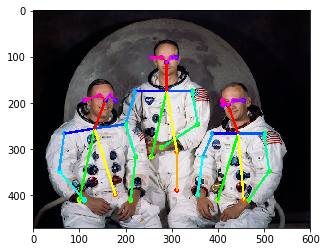

In [11]:
def plot_dir(directory, n_samples=None):
    """Plot first `n_samples` images in `directory`."""
    inference_images = [os.path.join(directory, path) for path in os.listdir(directory)]    
    for image_path in inference_images[:n_samples]:
        im = mpimg.imread(image_path)
        plt.imshow(im)
        plt.show()

output_dir = 'tf-pose-estimation/output'    
plot_dir(output_dir, n_samples=1)

### Estimate poses of image sequence

In [12]:
%%writefile pose_job.txt
#PBS -N DetectHumanoids
#PBS -l nodes=1
cd $PBS_O_WORKDIR
echo "Run pose estimation in conda environment"
source activate py3
# Clone fork of @ildoonet's CPU-optimized TensorFlow implementation of @ZheC's
# Realtime Multi-Person Pose Estimation
cd $PBS_O_WORKDIR/tf-pose-estimation
git pull # pull any updates
git checkout demo
# set matplotlib backend to display showing images during inference
MPLBACKEND=Agg python src/run_directory.py --folder=tud-crossing-sequence
source deactivate
echo "End inference"
# leave an empty line at the bottom or else it won't run


Overwriting pose_job.txt


In [13]:
job = !qsub pose_job.txt
job_id = job[0].split('.')[0]            
wait_for(job_id)

job_files = '*' + job_id + '*'
output = !cat $job_files
# see the job output (stderr followed by stdout)
# output # optional

.....................................
Job 81794 completed after 1.26 minutes


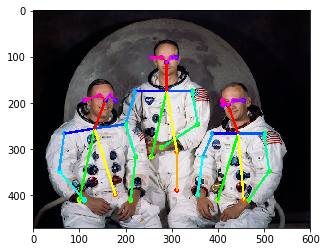

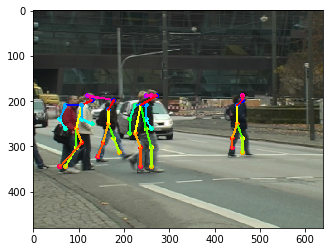

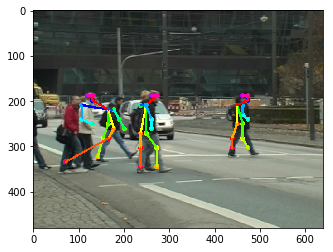

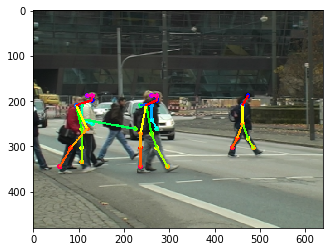

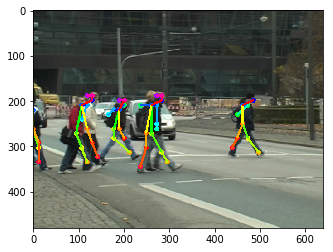

In [14]:
output_dir = 'tf-pose-estimation/output'    
plot_dir(output_dir,n_samples=5)